In [1]:
# CONNECT GOOGLE DRIVE
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
!unzip '/content/drive/My Drive/workshop_octav/tegal_NLP/DATASET/spectrogram_middle' -d '/content/drive/My Drive/dataset/spectrogram_middle/'

Archive:  /content/drive/My Drive/workshop_octav/tegal_NLP/DATASET/spectrogram_middle.zip
   creating: /content/drive/My Drive/dataset/spectrogram_middle/spectrogram_middle/
  inflating: /content/drive/My Drive/dataset/spectrogram_middle/spectrogram_middle/.DS_Store  
   creating: /content/drive/My Drive/dataset/spectrogram_middle/__MACOSX/
   creating: /content/drive/My Drive/dataset/spectrogram_middle/__MACOSX/spectrogram_middle/
  inflating: /content/drive/My Drive/dataset/spectrogram_middle/__MACOSX/spectrogram_middle/._.DS_Store  
   creating: /content/drive/My Drive/dataset/spectrogram_middle/spectrogram_middle/1980/
  inflating: /content/drive/My Drive/dataset/spectrogram_middle/spectrogram_middle/1980/638.png  
  inflating: /content/drive/My Drive/dataset/spectrogram_middle/spectrogram_middle/1980/610.png  
  inflating: /content/drive/My Drive/dataset/spectrogram_middle/spectrogram_middle/1980/604.png  
  inflating: /content/drive/My Drive/dataset/spectrogram_middle/spectrogram

In [2]:
import os, re, glob, cv2, numpy as np

dirs = os.listdir('/content/drive/My Drive/dataset/spectrogram_middle/spectrogram_middle/')
label = 0
im_arr = []
lb_arr = []
X = []
y = []
for i in dirs: #loop all directory
    count = 0
    for pic in glob.glob('/content/drive/My Drive/dataset/spectrogram_middle/spectrogram_middle/'+i+'/*.png'):
        im = cv2.imread(pic) #open image
        im = cv2.resize(im,(70,70))
        im = np.array(im) #change into array
        count = count + 1
        X.append(im)
        y.append(label)
        if(count == 3): #SAmple
            im_arr.append({str(i):im})
    print("Jumlah "+str(i)+" : "+str(count))
    label = label + 1
    lb_arr.append(i)
X = np.array(X)
y = np.array(y);

Jumlah 1980 : 200
Jumlah 1970 : 199
Jumlah 1990 : 200
Jumlah 2000 : 200
Jumlah now : 200


In [4]:
len(X)

999

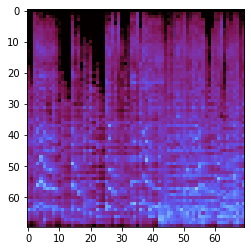

In [8]:
import matplotlib.pyplot as plt
plt.imshow(X[100])
plt.show()

In [9]:
# PREPROCESSING
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

X_train = X_train.astype('float32') #set x_train data type as float32
X_test = X_test.astype('float32') #set x_test data type as float32
X_train /= 255 #change x_train value between 0 - 1
X_test /= 255 #change x_test value between 0 - 1
y_train = to_categorical(y_train, 5) #change label to binary / categorical: [1 0 0 0] = 0, [0 1 0 0] = 1, so on
y_test = to_categorical(y_test, 5) #change label to binary / categorical

In [ ]:
# ARSITEKTUR
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense
model = Sequential() #model = sequential 
model.add(Conv2D(32, kernel_size=(3, 3),activation='relu',input_shape=(70,70,3))) #layer convolutional 2D
model.add(MaxPooling2D(pool_size=(2,2))) #max pooling with stride (2,2)
model.add(Conv2D(32, (3, 3), activation='relu')) #layer convolutional 2D
model.add(MaxPooling2D(pool_size=(2,2))) #max pooling with stride (2,2)
model.add(Dropout(0.25)) #delete neuron randomly while training and remain 75%
model.add(Flatten()) #make layer flatten
model.add(Dense(128, activation='relu')) #fully connected layer
model.add(Dropout(0.5)) #delete neuron randomly and remain 50%
model.add(Dense(5, activation='softmax')) #softmax works

In [ ]:
# ARSITEKTUR
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, LSTM, Embedding
model = Sequential() #model = sequential 
model.add(Conv2D(32, kernel_size=(3, 3),activation='relu',input_shape=(70,70,3))) #layer convolutional 2D
model.add(MaxPooling2D(pool_size=(2,2))) #max pooling with stride (2,2)
model.add(Conv2D(32, (3, 3), activation='relu')) #layer convolutional 2D
model.add(MaxPooling2D(pool_size=(2,2))) #max pooling with stride (2,2)
model.add(Dropout(0.25)) #delete neuron randomly while training and remain 75%
model.add(Flatten()) #make layer flatten
model.add(Embedding(input_dim=1000, output_dim=64))
model.add(LSTM(128))
model.add(Dense(128, activation='relu')) #fully connected layer
model.add(Dropout(0.5)) #delete neuron randomly and remain 50%
model.add(Dense(5, activation='softmax')) #softmax works

In [ ]:
# COMPILE
from tensorflow.keras.optimizers import SGD
epochs = 25
lrate = 0.01
decay = lrate/epochs
sgd = SGD(lr=lrate, momentum=0.9, decay=decay, nesterov=False)
model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 68, 68, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 34, 34, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 16, 16, 32)       0         
 2D)                                                             
                                                                 
 dropout (Dropout)           (None, 16, 16, 32)        0         
                                                                 
 flatten (Flatten)           (None, 8192)              0

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


In [ ]:
#TRAINING
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=epochs, batch_size=32)
scores = model.evaluate(X_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

Epoch 1/25
21/21 [==============================] - 282s 13s/step - loss: 1.6108 - accuracy: 0.1779 - val_loss: 1.6146 - val_accuracy: 0.1727
Epoch 2/25
21/21 [==============================] - 279s 13s/step - loss: 1.6093 - accuracy: 0.1928 - val_loss: 1.6191 - val_accuracy: 0.1636
Epoch 3/25
21/21 [==============================] - 284s 14s/step - loss: 1.6090 - accuracy: 0.2167 - val_loss: 1.6211 - val_accuracy: 0.1636
Epoch 4/25
21/21 [==============================] - 282s 14s/step - loss: 1.6065 - accuracy: 0.2362 - val_loss: 1.6200 - val_accuracy: 0.1636
Epoch 5/25
21/21 [==============================] - 282s 14s/step - loss: 1.6090 - accuracy: 0.2078 - val_loss: 1.6198 - val_accuracy: 0.1636
Epoch 6/25
21/21 [==============================] - 284s 14s/step - loss: 1.6084 - accuracy: 0.2048 - val_loss: 1.6220 - val_accuracy: 0.1636
Epoch 7/25
21/21 [==============================] - 284s 14s/step - loss: 1.6088 - accuracy: 0.2123 - val_loss: 1.6200 - val_accuracy: 0.1636
Epoch 

In [ ]:
#PREDIKSI
y_pred = model.predict(X_test)

In [ ]:
# ITERASI X_TEST
y_prediction_n = []
y_test_n = []
for i in range(0, len(y_pred)):
    max_n = max(y_pred[i])
    max_m = max(y_test[i])
    index_n = [index_n for index_n, j in enumerate(y_pred[i]) if j == max_n]
    index_m = [index_m for index_m, j in enumerate(y_test[i]) if j == max_m]
    y_prediction_n.append(index_n)
    y_test_n.append(index_m)

In [ ]:
#CLASSIFICATION REPORT
from sklearn.metrics import confusion_matrix, classification_report
confusion_matrix(y_test_n, y_prediction_n)

array([[29,  0,  6,  9, 13],
       [25,  2,  9, 28, 14],
       [12,  2, 16, 36,  7],
       [ 4,  1,  8, 34,  7],
       [19,  0,  2,  7, 40]])

In [ ]:
print(classification_report(y_test_n, y_prediction_n, target_names=["1970","1980","1990","2000","2010"]))

              precision    recall  f1-score   support

        1970       0.33      0.51      0.40        57
        1980       0.40      0.03      0.05        78
        1990       0.39      0.22      0.28        73
        2000       0.30      0.63      0.40        54
        2010       0.49      0.59      0.54        68

    accuracy                           0.37       330
   macro avg       0.38      0.39      0.33       330
weighted avg       0.39      0.37      0.32       330

